<a href="https://colab.research.google.com/github/vkmb-17/Arq/blob/main/An%C3%A1lise_e_Limpeza_da_base_de_dados_sobre_o_Oscar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# NOTEBOOK
# VICTOR KAUAN MORENO DE BRITO

In [ ]:
!pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from operator import itemgetter
import pandas as pd
import requests
import io

#Importação dos dados de the oscar
url = "https://raw.githubusercontent.com/P9Lucas/Oscars/main/the_oscar_award%20-%20the_oscar_award.csv"
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))
font = {'family':'serif','color':'black','size':15}

## 1) CRIE UM GRÁFICO DE BARRAS, QUE MOSTRE OS ATORES MAIS INDICADOS QUE NUNCA RECEBERAM OSCAR ( 2000 - 2010 )

In [ ]:
#Busca pelos dados
raw_ator1 = df[df.winner == True][df.category == 'ACTOR'][df.year_film >= 2000][df.year_film <= 2010]['name'].value_counts()
raw_atriz1 = df[df.winner == True][df.category == 'ACTRESS'][df.year_film >= 2000][df.year_film <= 2010]['name'].value_counts()
raw_ator_sup = df[df.winner == True][df.category == 'ACTOR IN A SUPPORTING ROLE'][df.year_film >= 2000][df.year_film <= 2010]['name'].value_counts()
raw_atriz_sup = df[df.winner == True][df.category == 'ACTRESS IN A SUPPORTING ROLE'][df.year_film >= 2000][df.year_film <= 2010]['name'].value_counts()
raw_ator2 = df[df.winner == True][df.category == 'ACTOR IN A LEADING ROLE'][df.year_film >= 2000][df.year_film <= 2010]['name'].value_counts()
raw_atriz2 = df[df.winner == True][df.category == 'ACTRESS IN A LEADING ROLE'][df.year_film >= 2000][df.year_film <= 2010]['name'].value_counts()

#Transformar os dados de series para dicionario(counter)
ator1 = Counter(raw_ator1.to_dict())
ator2 = Counter(raw_ator2.to_dict())
atriz1 = Counter(raw_atriz1.to_dict())
atriz2 = Counter(raw_atriz2.to_dict())
ator_sup = Counter(raw_ator_sup.to_dict())
atriz_sup = Counter(raw_atriz_sup.to_dict())

#Junção dos dicionários
raw_atores = ator1+ator2+atriz1+atriz2+ator_sup+atriz_sup

atores = dict(sorted(raw_atores.items(), key=itemgetter(1), reverse=True)[:5])

In [ ]:
#Busca pelos dados
raw_ator1 = df[df.winner == False][df.category == 'ACTOR'][df.year_film >= 2000][df.year_film <= 2010]['name'].value_counts()
raw_atriz1 = df[df.winner == False][df.category == 'ACTRESS'][df.year_film >= 2000][df.year_film <= 2010]['name'].value_counts()
raw_ator_sup = df[df.winner == False][df.category == 'ACTOR IN A SUPPORTING ROLE'][df.year_film >= 2000][df.year_film <= 2010]['name'].value_counts()
raw_atriz_sup = df[df.winner == False][df.category == 'ACTRESS IN A SUPPORTING ROLE'][df.year_film >= 2000][df.year_film <= 2010]['name'].value_counts()
raw_ator2 = df[df.winner == False][df.category == 'ACTOR IN A LEADING ROLE'][df.year_film >= 2000][df.year_film <= 2010]['name'].value_counts()
raw_atriz2 = df[df.winner == False][df.category == 'ACTRESS IN A LEADING ROLE'][df.year_film >= 2000][df.year_film <= 2010]['name'].value_counts()

#Transformar os dados de series para dicionario(counter)
ator1 = Counter(raw_ator1.to_dict())
ator2 = Counter(raw_ator2.to_dict())
atriz1 = Counter(raw_atriz1.to_dict())
atriz2 = Counter(raw_atriz2.to_dict())
ator_sup = Counter(raw_ator_sup.to_dict())
atriz_sup = Counter(raw_atriz_sup.to_dict())

#Junção dos dicionários
raw_atores2 = ator1+ator2+atriz1+atriz2+ator_sup+atriz_sup
atores_sem_oscar = {k:v for k,v in raw_atores2.items() if k not in raw_atores}

atores2 = dict(sorted(atores_sem_oscar.items(), key=itemgetter(1), reverse=True)[:5])

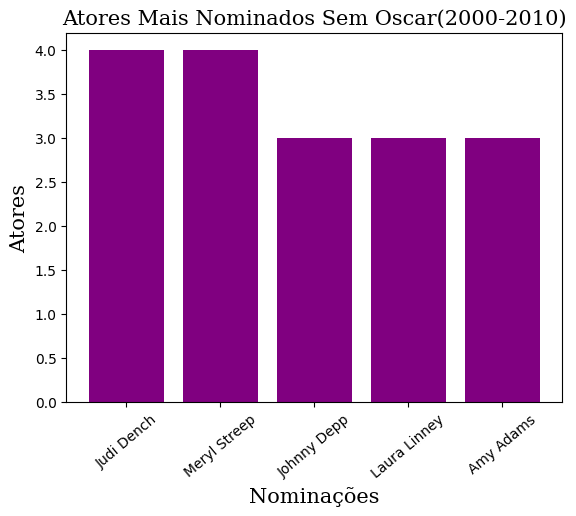

In [ ]:
#Junção de todos os dados em arrays
x = (list(atores2.keys()))
y = np.array(list(atores2.values()))

#Plot do gráfico
plt.title("Atores Mais Nominados Sem Oscar(2000-2010)", fontdict = font)
plt.xlabel("Nominações", fontdict = font)
plt.ylabel("Atores", fontdict = font)
plt.xticks(rotation=40)
plt.bar(x,y, color = 'purple')
plt.show()

## 2) CRIE UM GRÁFICO DE PIZZA QUE MOSTRE OS FILMES MAIS PREMIADOS DA HISTÓRIA

In [ ]:
#Busca pelos filmes
aux = df[df.winner == True]['film'].value_counts()
film = aux.head(5)
film

Titanic                                          12
Ben-Hur                                          11
The Lord of the Rings: The Return of the King    11
West Side Story                                  11
The Last Emperor                                  9
Name: film, dtype: int64

In [ ]:
#Filmes com o mesmo título de titanic
df[df.winner == True][df.film == 'Titanic']

<ipython-input-10-25e32f67ae79>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.winner == True][df.film == 'Titanic']


,year_film,year_ceremony,ceremony,category,name,film,winner
2879,1953,1954,26,WRITING (Story and Screenplay),"Charles Brackett, Walter Reisch, Richard Breen",Titanic,True
7692,1997,1998,70,ART DIRECTION,Art Direction: Peter Lamont; Set Decoration:...,Titanic,True
7696,1997,1998,70,CINEMATOGRAPHY,Russell Carpenter,Titanic,True
7701,1997,1998,70,COSTUME DESIGN,Deborah L. Scott,Titanic,True
7707,1997,1998,70,DIRECTING,James Cameron,Titanic,True
7722,1997,1998,70,FILM EDITING,"Conrad Buff, James Cameron, Richard A. Harris",Titanic,True
7735,1997,1998,70,MUSIC (Original Dramatic Score),James Horner,Titanic,True
7745,1997,1998,70,MUSIC (Original Song),Music by James Horner; Lyric by Will Jennings,Titanic,True
7750,1997,1998,70,BEST PICTURE,"James Cameron and Jon Landau, Producers",Titanic,True
7765,1997,1998,70,SOUND,"Gary Rydstrom, Tom Johnson, Gary Summers, Mark...",Titanic,True


In [ ]:
#Transformação de Series para dicionário
win = film.to_dict()
win['Titanic']-=1

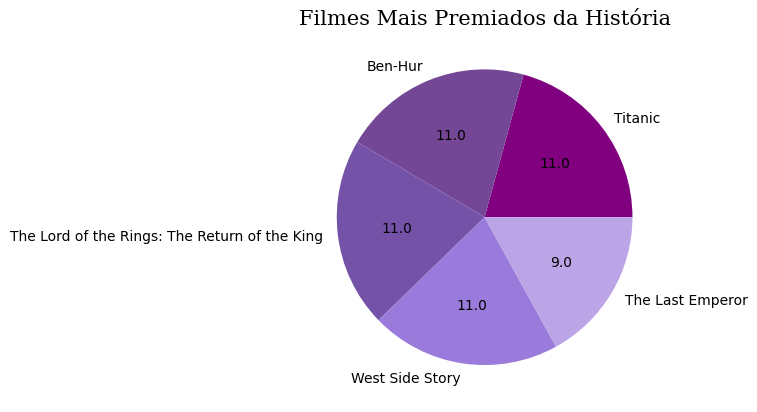

In [ ]:
#Valores do gráfico
mylabels = list(win.keys())
y = np.array(list(win.values()))

#Personalização do gráfico
mycolors = ["purple", "#744796", "#7452A8", "#9A7BDB", "#BBA5E6"]

def absolute_value(val):
    a  = np.round(val/100.*y.sum(), 0)
    return a

#Plot do gráfico
plt.title("Filmes Mais Premiados da História", fontdict = font)
plt.pie(y, labels = mylabels, colors = mycolors, autopct = absolute_value)
plt.show()

## 3) ATRAVES DE UM GRÁFICO DE BARRAS, EXPONHA OS ATORES MAIS PREMIADOS DE 2000 A 2010

In [ ]:
#Busca pelos dados
raw_ator1 = df[df.winner == True][df.year_film >= 2000][df.year_film <= 2010][df.category == 'ACTOR']['name'].value_counts()
raw_atriz1 = df[df.winner == True][df.year_film >= 2000][df.year_film <= 2010][df.category == 'ACTRESS']['name'].value_counts()
raw_ator_sup = df[df.winner == True][df.year_film >= 2000][df.year_film <= 2010][df.category == 'ACTOR IN A SUPPORTING ROLE']['name'].value_counts()
raw_atriz_sup = df[df.winner == True][df.year_film >= 2000][df.year_film <= 2010][df.category == 'ACTRESS IN A SUPPORTING ROLE']['name'].value_counts()
raw_ator2 = df[df.winner == True][df.year_film >= 2000][df.year_film <= 2010][df.category == 'ACTOR IN A LEADING ROLE']['name'].value_counts()
raw_atriz2 = df[df.winner == True][df.year_film >= 2000][df.year_film <= 2010][df.category == 'ACTRESS IN A LEADING ROLE']['name'].value_counts()

#Transformar os dados de series para dicionario(counter)
ator1 = Counter(raw_ator1.to_dict())
ator2 = Counter(raw_ator2.to_dict())
atriz1 = Counter(raw_atriz1.to_dict())
atriz2 = Counter(raw_atriz2.to_dict())
ator_sup = Counter(raw_ator_sup.to_dict())
atriz_sup = Counter(raw_atriz_sup.to_dict())

#Junção dos dicionários
raw_atores = ator1+ator2+atriz1+atriz2+ator_sup+atriz_sup

atores = dict(sorted(raw_atores.items(), key=itemgetter(1), reverse=True)[:5])

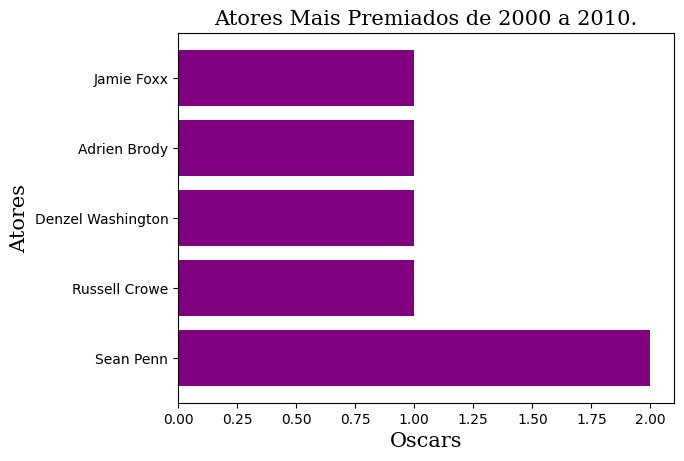

In [ ]:
#Junção de todos os dados em arrays
x = (list(atores.keys()))
y = np.array(list(atores.values()))

#Plot do gráfico
plt.title("Atores Mais Premiados de 2000 a 2010.", fontdict = font)
plt.xlabel("Oscars", fontdict = font)
plt.ylabel("Atores", fontdict = font)
plt.barh(x,y, color = 'purple')
plt.show()

## 4) CRIE UM GRÁFICO REPRESENTANDO QUAIS OS DIRETORES MAIS PREMIADOS DURANTE A ERA DE OURO DO CINEMA

In [ ]:
#Busca pelos dados
direct = df[df.winner == True][df.category == 'DIRECTING'][df.year_film >= 1930][df.year_film <= 1960]['name'].value_counts()

#Transformar o dado de series para dicionario
director = (direct.head(5)).to_dict()

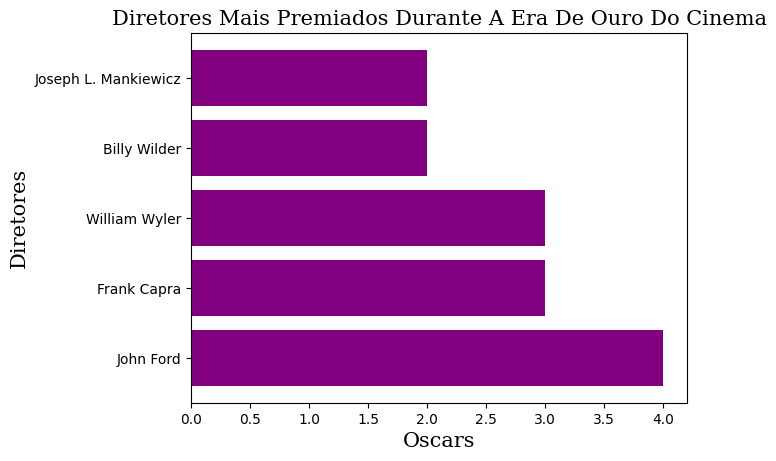

In [ ]:
#Junção de todos os dados em arrays
x = (list(director.keys()))
y = np.array(list(director.values()))

#Plot do gráfico
plt.title("Diretores Mais Premiados Durante A Era De Ouro Do Cinema", fontdict = font)
plt.xlabel("Oscars", fontdict = font)
plt.ylabel("Diretores", fontdict = font)
plt.barh(x,y, color = 'purple')
plt.show()

## 5) CRIE UM HISTOGRAMA DEMONSTRANDO A QUANTIDADE DE FILMES INDICADOS AO OSCAR POR ANO ( 2015 A 2020 )

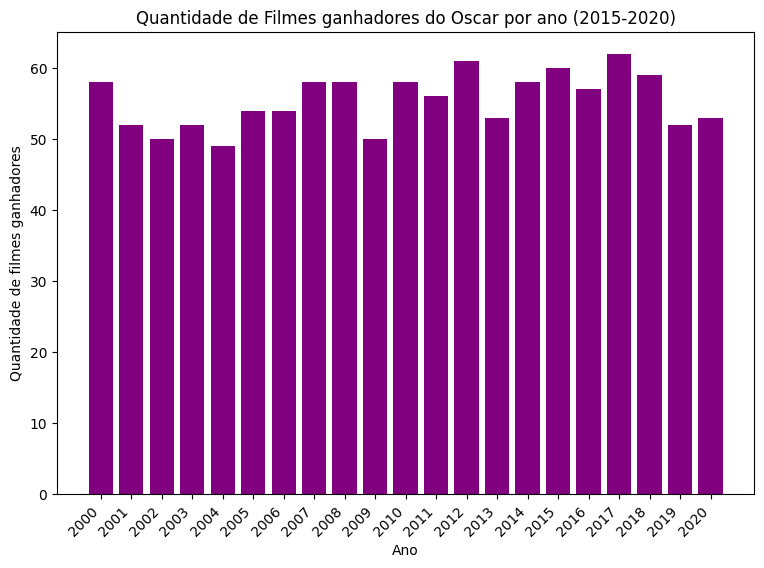

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando o arquivo CSV
url = 'https://raw.githubusercontent.com/P9Lucas/Oscars/main/the_oscar_award%20-%20the_oscar_award.csv'
df = pd.read_csv(url)

# Filtrando os dados para os anos de 2015 a 2020
df_filtered = df[(df['year_ceremony'] >= 2000) & (df['year_ceremony'] <= 2020)]

# Agrupando os dados por ano e filme ganhador
grouped = df_filtered.groupby(['year_ceremony', 'film'])

# Contando o número de prêmios por filme ganhador em cada ano
counts = grouped.size()

# Criando uma lista de filmes ganhadores para cada ano
films_per_year = {}
for year in range(2000, 2021):
    films_per_year[year] = []
    year_data = counts.loc[year]
    for film in year_data.index:
        films_per_year[year].append(film)

# Gerando o histograma
fig, ax = plt.subplots(figsize=(9, 6))
for year, films in films_per_year.items():
    ax.bar(year, len(films), color='purple')

ax.set_xlabel('Ano')
plt.xticks(rotation=45, ha='right')
ax.set_ylabel('Quantidade de filmes ganhadores')
ax.set_title('Quantidade de Filmes ganhadores do Oscar por ano (2015-2020)')
ax.set_xticks(range(2000, 2021))
plt.show()